# Final Project: Regression Anaylsis

__Name: Mindy Cruz__

__Date: 4/19/2025__

__Intro:__
- I will be taking the Medical Cost data set and apply regression modeling techniques. Regression analysis helps identify and quantify these relationships between numerical features, providing insights that can be used for forecasting and decision-making.


# Section 1: Import and Inspect Data

In [355]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,)


__1.1 Load the dataset and display the first 10 rows__

In [356]:
# Load the dataset
df = pd.read_csv("insurance.csv", sep=",")

# Display structure and first few rows
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


__1.2 Check for missing values and display summary statistics__

In [357]:
#check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [358]:
#display summary stats
df.describe(include='all')


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


__Reflection 1:__

 What do you notice about the dataset? Are there any data issues?

 - There is no missing data.
 - 1338 entries
 - Sex, Smoker and Region are non-numerical- they will need to be encoded for modeling

# Section 2: Data Exploration and Preparation

__2.1 Explore data patterns and distribution__

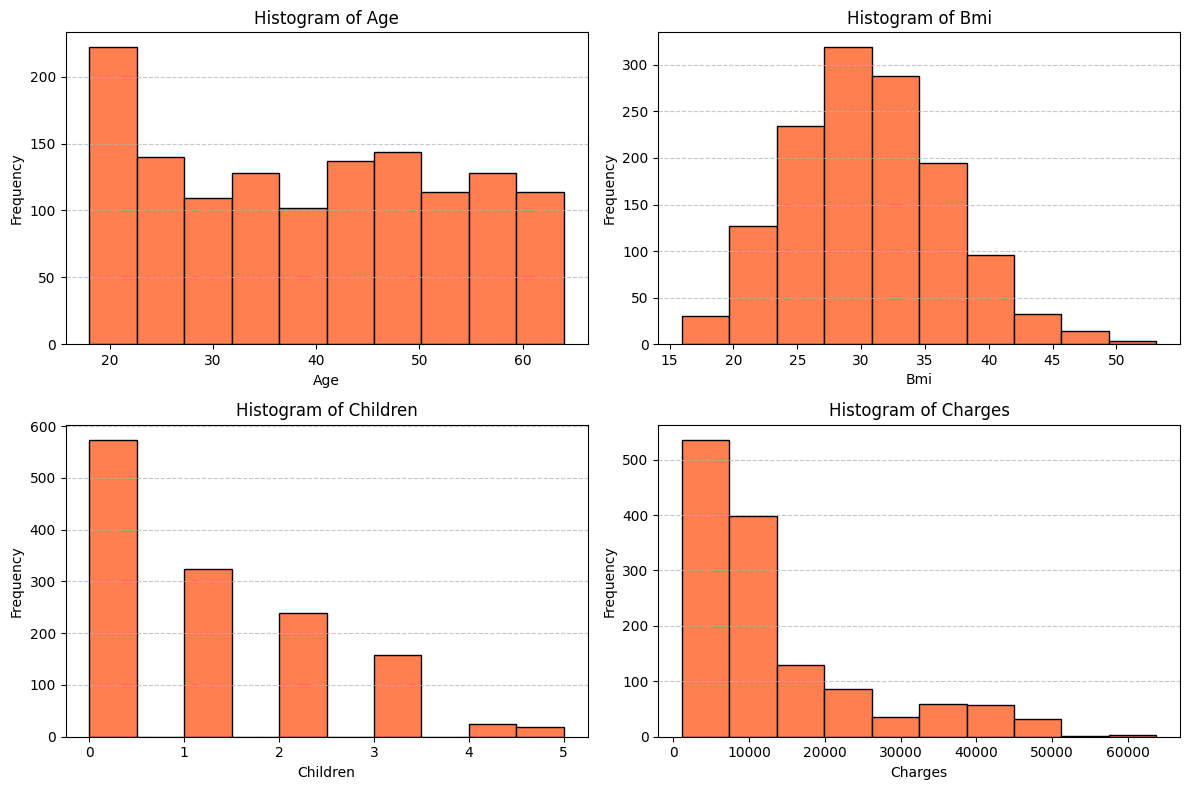

In [359]:

numeric_columns = ['age', 'bmi', 'children', 'charges']

# Set up the figure size and layout
plt.figure(figsize=(12, 8))

# Loop through the numeric columns and create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[column], bins=10, color='coral', edgecolor='black')
    plt.title(f'Histogram of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

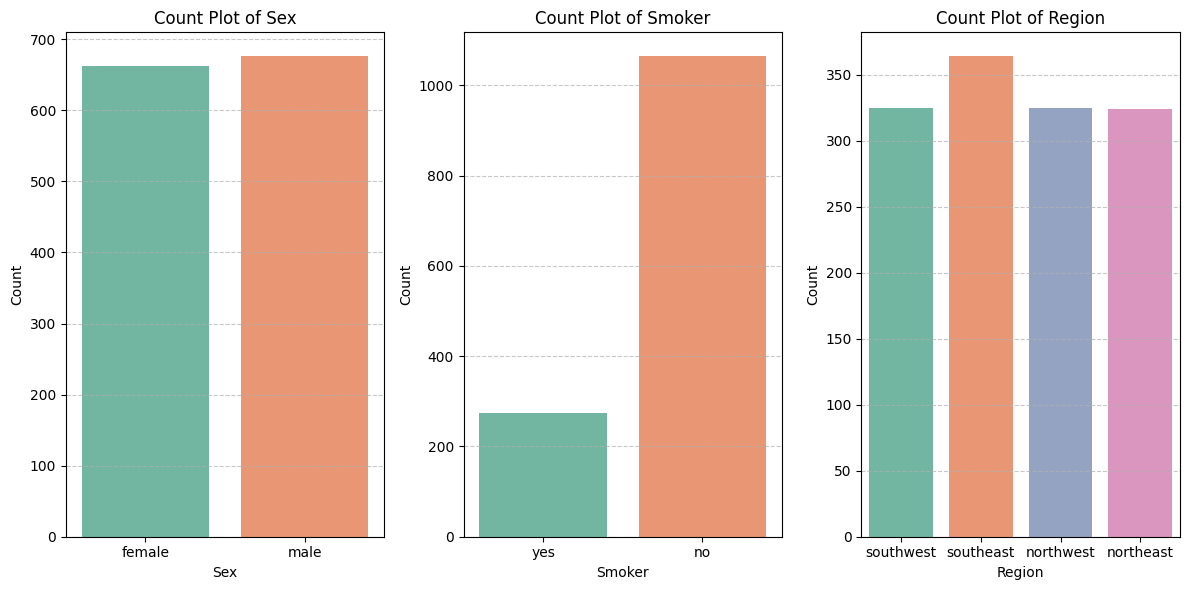

In [360]:
# Define the categorical columns
categorical_columns = ['sex', 'smoker', 'region']

# Set up the figure size and layout
plt.figure(figsize=(12, 6))

# Loop through categorical columns and create subplots
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=column, hue=column, palette='Set2', legend=False)
    plt.title(f'Count Plot of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

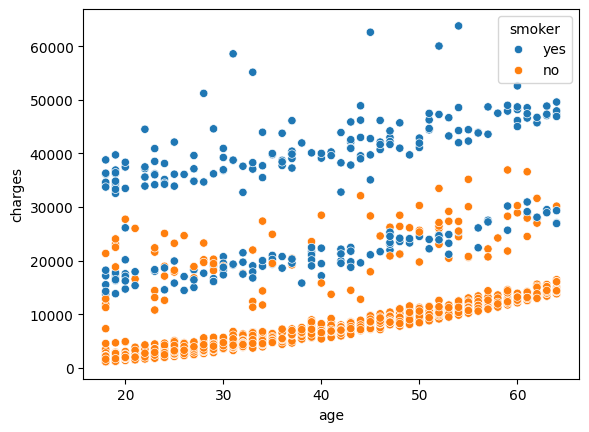

In [361]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.show()

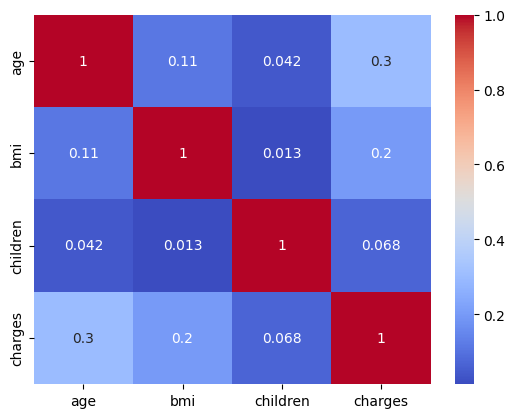

In [362]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64


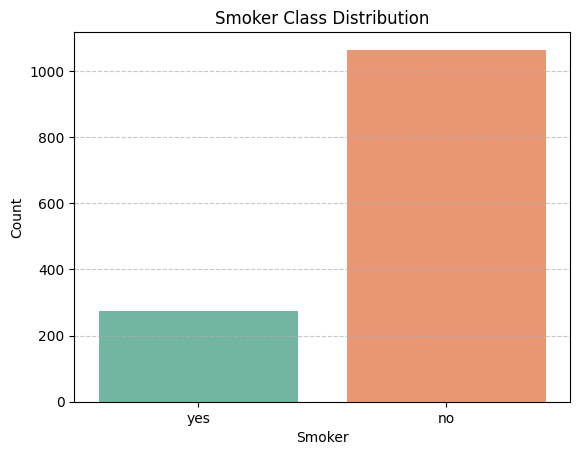

In [363]:
# Count distribution for smoker status
print(df['smoker'].value_counts(normalize=True) * 100)

# Plot the distribution (fixed for Seaborn >= 0.14)
sns.countplot(data=df, x='smoker', hue='smoker', palette='Set2', legend=False)
plt.title('Smoker Class Distribution')
plt.ylabel('Count')
plt.xlabel('Smoker')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

__2.2 Handle missing values and clean data__

- there are not missing values. 

__2.3 Feature selection and engineering__

In [364]:
# Label Encode 'sex' and 'smoker' (Binary)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# One-Hot Encode 'region' (Multiclass)
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# View the updated dataframe
print(df.head())


   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    1  27.900         0       1  16884.92400             False   
1   18    0  33.770         1       0   1725.55230             False   
2   28    0  33.000         3       0   4449.46200             False   
3   33    0  22.705         0       0  21984.47061              True   
4   32    0  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


__Reflection 2:__

- What patterns or anomalies do you see? 
    - On one of visuals, the scatterplot, we can see that smoking lead to higher charges. The data is a good mix of female and male as well as age ranges, we can see this in the historgrams above. 
- Do any features stand out?
    - Smoking seems to be a driving factor for increase charges
- What preprocessing steps were necessary to clean and improve the data? 
    - I did have to encode the non numerical features.
- Did you create or modify any features to improve performance?
    - I did no create or modify any features. 

# Section 3. Feature Selection and Justification

__3.1 Choose Features and Target__

- My target will be: charges
- My inputs: sex, bmi, smoker


__3.2 Define X and y__

In [365]:
# Define target variable
y = df['charges']

# Define input features
X = df.drop(['charges'], axis=1)

__Reflection 3:__ 

- Why did you choose these features? How might they impact predictions or accuracy?
    - I chose the features sex, bmi and smoker because I beleive they have an impact on the target I chose, charges. 

# Section 4. Train a Model (Linear Regression)

__4.1 Split the data into training and test sets using train_test_split__

In [366]:
# split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

__4.2 Train model using Scikit-Learn model.fit() method__

In [367]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

__4.3 Evaluate Performance__

In [368]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"{'R²':<10} {'MAE':<15} {'RMSE':<15}")
print(f'{r2:.3f}      ${mae:.2f}         ${rmse:.2f}')


R²         MAE             RMSE           
0.784      $4181.19         $5796.28


__Reflection 4:__
- How well did the model perform? Any surprises in the results?
    - I think the model did really well. R² of .784 idicates that that features I chose do a decent jobs of explaining medical charges. MAE and RMSE are close in value which leads me to beleive that the model is not being skewed by outliers. I did not find anything suprising and I think this model did a really good job. 
    

# Section 5. Improve the Model or Try Alternates

5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

In [369]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),     
    ('scaler', StandardScaler()),                   
    ('regressor', LinearRegression())              
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#print results
print(f"{'R²':<10} {'MAE':<15} {'RMSE':<15}")
print(f'{r2:.3f}      ${mae:.2f}         ${rmse:.2f}')

R²         MAE             RMSE           
0.784      $4181.19         $5796.28


__5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression__

In [370]:
# Split your data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the pipeline
pipeline_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),           
    ('poly_features', PolynomialFeatures(degree=3)),       
    ('scaler', StandardScaler()),                          
    ('regressor', LinearRegression())                      
])

# Train the pipeline
pipeline_2.fit(X_train, y_train)

# Predict on the test data
y_pred_2 = pipeline_2.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred_2)
mae = mean_absolute_error(y_test, y_pred_2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))

# Print results
print(f"{'R²':<10} {'MAE':<15} {'RMSE':<15}")
print(f'{r2:.3f}      ${mae:.2f}         ${rmse:.2f}')

R²         MAE             RMSE           
0.849      $2937.92         $4847.50


__5.3 Compare performance of all models across the same performance metrics__

In [371]:
# Initial Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Evaluate Pipeline 1
y_pred_1 = pipeline.predict(X_test)
r2_1 = r2_score(y_test, y_pred_1)
mae_1 = mean_absolute_error(y_test, y_pred_1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))

# Evaluate Pipeline 2
y_pred_2 = pipeline_2.predict(X_test)
r2_2 = r2_score(y_test, y_pred_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))

# Print Comparison Table
print(f"{'Model':<35} {'R²':<10} {'MAE':<15} {'RMSE':<15}")
print(f"{'-'*75}")
print(f'Initial Evaluation                     {r2:.3f}      ${mae:.2f}         ${rmse:.2f}')
print(f'Pipeline 1 (Linear Regression)         {r2_1:.3f}      ${mae_1:.2f}         ${rmse_1:.2f}')
print(f'Pipeline 2 (Polynomial Degree 3)       {r2_2:.3f}      ${mae_2:.2f}         ${rmse_2:.2f}')


Model                               R²         MAE             RMSE           
---------------------------------------------------------------------------
Initial Evaluation                     0.784      $4181.19         $5796.28
Pipeline 1 (Linear Regression)         0.784      $4181.19         $5796.28
Pipeline 2 (Polynomial Degree 3)       0.849      $2937.92         $4847.50


__Reflection 5:__
- Which models performed better?
    - Pipeline 2- Polynomial- performed the best. These types of models do better with nonlinear data and using charges for this project works really well this type of model because medical charges are rarely distributed perfectly.
- How does scaling impact results?
    - Scaling usually improves models. Not all features are on the same scarle or fairly weighted. If we didn't scale we would see some features with lower amounts of datat get overwhelmed and drowned out by the predictors that have large amounts of data. In this set we could use children against charges. The histogram above can elude to this assumption.

# Section 6. Final Thoughts & Insights

__6.1 Summarize findings__
  
  | Model | R²| RMSE|  MAE| 
|------|-----------|--------|-----------|
| Initial Evaluation   | 0.784 | $4,181.19 | $5,796.28 | 
| Pipeline 1 (Linear Regression) | 0.784 | $4,181.19 | $5,796.28 | 
| Pipeline 2 (Polynomial Degree 3) | 0.849 | $2,937.92 | $4,847.50 | 


- We can see from this data that Pipeline 2, the polynomial model, gave best results.



__6.2 Discuss challenges faced__

- This project was pretty straight forward and I feel like the built up to this point has prepared me. In past projects I had some issues but they were all just pieces of what the project is. 

__6.3 If you had more time, what would you try next?__

- If i had more time I think I would have considering creating some additional or combined featues, like bmi + age. 
- Something that did strike me in this data is we dont get to see anomalies that might exist in insurance billing and also things thay may vary based on health history. We got some of the basics here with BMI and Smoking but I think there are other pieces of health history that could also tweak and improve the model. 
- I would try some additional modeling such as Random Forest Regressor- this works well with nonlinear data, which is what we have here using charges as the target. 


__Reflection 6:__
 - What did you learn from this project?
    - I learned how to set up a Regression model and interpret the results. 